# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [227]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [228]:
df.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [229]:
niver = df[df['DTNASC'] == '2019-01-07'].groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()
niver

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,3340.000000,NaN
12 anos ou mais,2797.857143,3117.777778
4 a 7 anos,3527.500000,3556.428571
8 a 11 anos,3180.571429,3444.130435


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [230]:
df['munResNome'].value_counts(ascending=True).head()

Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: munResNome, dtype: int64

In [231]:
df2 = df[['munResNome', 'IDADEPAI', 'IDADEMAE']]
df2[df2['munResNome'] == 'Castanheiras'].groupby('munResNome').agg([('Média','mean'),('Máxima', max),('Mínima', min)])

IDADEPAI                IDADEMAE              
                  Média Máxima Mínima     Média Máxima Mínima
munResNome                                                   
Castanheiras  30.392857   43.0   17.0  27.28125     39     17

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [232]:
df3 = df[['IDADEMAE', 'IDADEPAI', 'munResNome', 'DTNASC', 'QTDFILVIVO', 'ESCMAE', 'PESO', 'SEXO']]
df4 = df3.drop(df3[df3['munResNome']=='Município ignorado - RO'].index)

In [233]:
df4.loc[:,'DTNASC'] = pd.to_datetime(df4['DTNASC'])
df4.set_index('DTNASC', inplace=True)
df4['MES'] = df4.index.month
df4.head()

,IDADEMAE,IDADEPAI,munResNome,QTDFILVIVO,ESCMAE,PESO,SEXO,MES
DTNASC,,,,,,,,
2019-02-19,19,26.0,Alta Floresta D'Oeste,0.0,8 a 11 anos,3685,Masculino,2
2019-02-21,29,24.0,Alta Floresta D'Oeste,1.0,8 a 11 anos,3055,Feminino,2
2019-02-25,37,32.0,Alta Floresta D'Oeste,2.0,8 a 11 anos,3460,Feminino,2
2019-03-20,30,24.0,Alto Alegre dos Parecis,0.0,12 anos ou mais,2982,Feminino,3
2019-03-23,30,27.0,Alta Floresta D'Oeste,1.0,8 a 11 anos,3310,Feminino,3


In [234]:
df4[df4['MES'] == 3]['munResNome'].value_counts()[:5]

Porto Velho    744
Ji-Paraná      188
Vilhena        148
Ariquemes      141
Cacoal         133
Name: munResNome, dtype: int64

In [235]:
df4[df4['munResNome'] == 'Porto Velho'].groupby('munResNome').agg({'QTDFILVIVO':[('Média', 'mean'), ('Máxima', max), ('Mínima', min)]})

QTDFILVIVO              
                 Média Máxima Mínima
munResNome                          
Porto Velho   1.167236   12.0    0.0

In [236]:
df4[df4['munResNome'] == 'Porto Velho'].groupby('munResNome').agg({'IDADEPAI':[('Média', 'mean'), ('Máxima', max), ('Mínima', min)], 'IDADEMAE':[('Média', 'mean'), ('Máxima', max), ('Mínima', min)]})

IDADEPAI                IDADEMAE              
                 Média Máxima Mínima     Média Máxima Mínima
munResNome                                                  
Porto Velho  32.352679   65.0   16.0  26.31267     47     12

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [237]:
df.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [238]:
df.select_dtypes(exclude=['int64','float64']).head(2)

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia


In [239]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

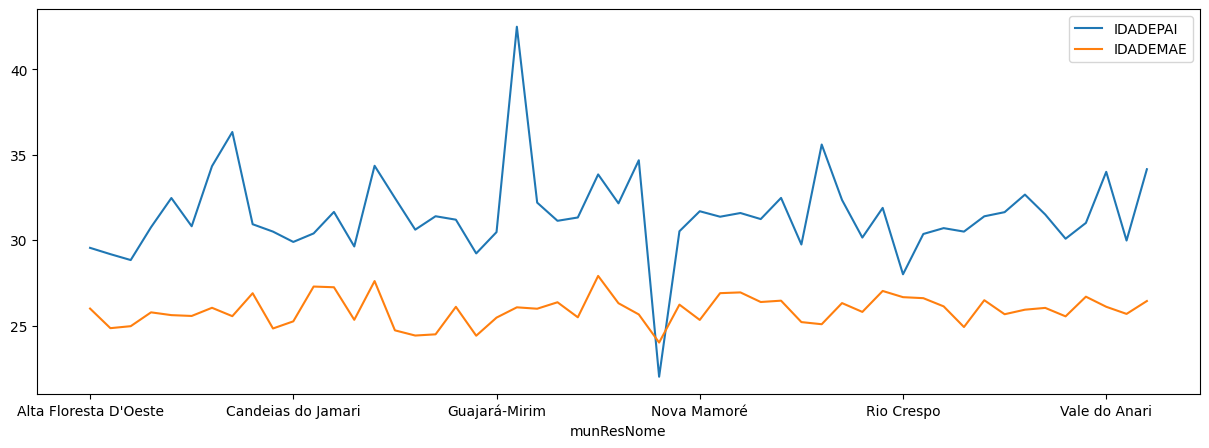

In [240]:
df2.groupby('munResNome').mean().plot(figsize=[15,5]);

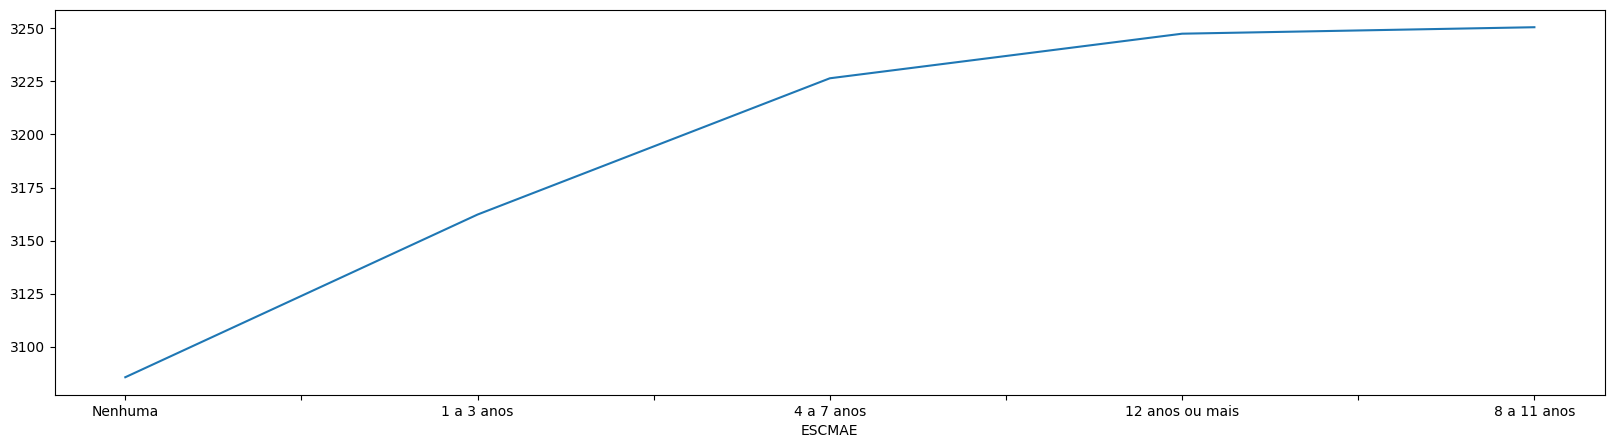

In [241]:
df3.groupby(['ESCMAE'])['PESO'].mean().sort_values().plot(figsize=[20,5]);

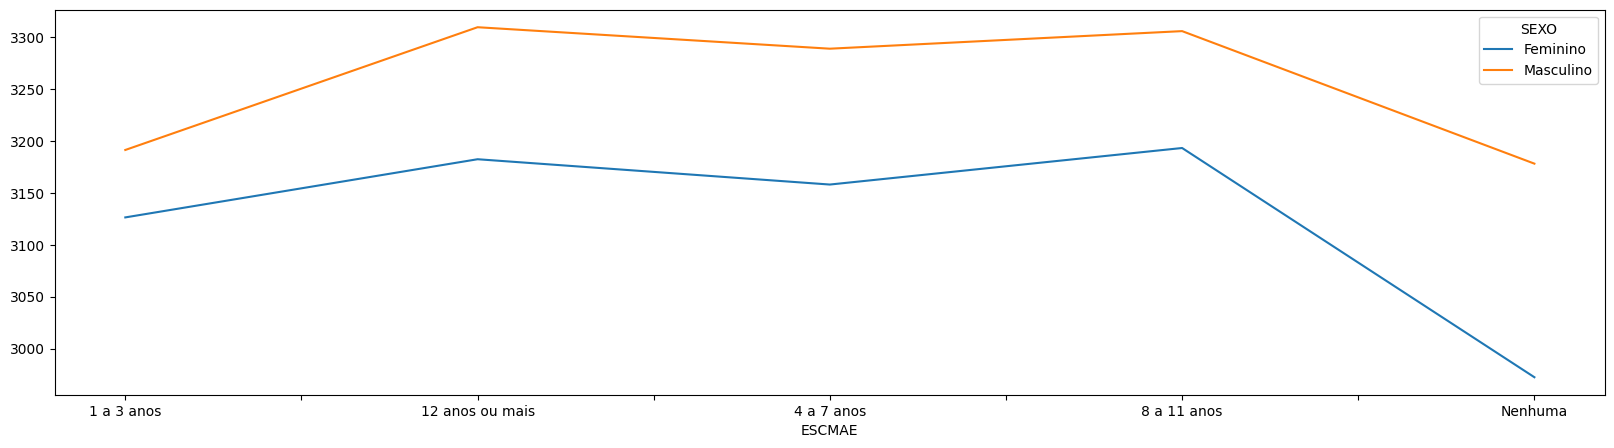

In [242]:
df3.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[20,5]);

No Item 1 podemos identificar é bem comum as mulheres terem filhos com homens mais velhos do que elas.

No Item 2, podemos observar que meninos nascem mais pesados do que meninas, e que quanto mais estudo tem a mãe, mais pesado nascem os bebês

Nos Itens 3 e 4 não foi observado nada fora do normal.